<a href="https://colab.research.google.com/github/matheusvazdata/regressao-usando-scikit-learn/blob/main/Projeto_24_11_2024_Regressao_usando_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a>Projeto - Regressão usando Scikit Learn</a>

## <a> Motivação </a>

O papel do cientista de dados é resolver problemas reais, e um dos desafios mais comuns envolve a previsão de valores numéricos contínuos. Esses problemas são conhecidos como problemas de regressão.

Este projeto foi desenvolvido como uma introdução prática ao Machine Learning, explorando o ciclo completo de um modelo de regressão, desde a preparação dos dados até a avaliação e comparação de modelos. Aqui estão os principais objetivos abordados:

1. Exploração dos Dados: Análise exploratória para compreender as características do dataset.
2. Preparação dos Dados: Separação entre conjuntos de treino e teste, normalização e tratamento de valores ausentes.
3. Criação de Modelos Preditivos: Implementação de diferentes algoritmos de regressão com a biblioteca Scikit-Learn.
4. Validação Cruzada: Avaliação robusta utilizando técnicas como cross-validation para verificar a generalização dos modelos.
5. Avaliação de Desempenho: Comparação de métricas de erro (como RMSE, MAE, e
𝑅²) entre os modelos para identificar o melhor desempenho.

Este notebook é uma oportunidade para consolidar conceitos fundamentais de aprendizado supervisionado e práticas recomendadas em projetos de Ciência de Dados.

## <a> Objeto de Estudo </a>

Neste projeto, trabalharemos com dados relacionados a planos de saúde. A área de saúde e seguradoras têm se beneficiado amplamente de técnicas de Ciência de Dados e Machine Learning para avaliar riscos, estimar custos e melhorar a tomada de decisões estratégicas.

Utilizaremos uma base de dados retirada do livro [*Machine Learning with R*](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) de Brett Lantz, disponível publicamente no repositório [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets).

### **Problema**

O objetivo deste estudo é construir um modelo preditivo para estimar os **gastos com planos de saúde** com base em características específicas dos segurados, como idade, gênero, índice de massa corporal (IMC), histórico de tabagismo e região de residência.

### **Relevância**

1. **Para os segurados**:
   - Entender quais características impactam mais nos custos do plano de saúde.
   - Avaliar como mudanças de hábitos ou condições podem influenciar os valores cobrados.

2. **Para as seguradoras**:
   - Melhorar o cálculo de preços e previsões de gastos.
   - Garantir equilíbrio financeiro ao ajustar prêmios com base no perfil de risco de cada cliente.

Este tipo de análise é essencial para promover eficiência financeira e transparência tanto para os segurados quanto para as empresas.

### Leitura e "cheiro" dos dados

In [1]:
# Importando bibliotecas essenciais para manipulação de dados e visualização
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações globais para melhor visualização de dados
pd.set_option('display.max_rows', 100)  # Mostra até 100 linhas para evitar sobrecarga visual
pd.set_option('display.max_columns', 50)  # Mostra até 50 colunas para facilitar a análise
pd.set_option('display.float_format', '{:.2f}'.format)  # Evita notação científica, exibe números com 2 casas decimais

# Configurações para gráficos com estilo válido na sua versão
plt.style.use('seaborn-v0_8-darkgrid')  # Escolhendo um estilo disponível no ambiente
sns.set_palette('pastel')  # Configurando uma paleta de cores suaves

In [2]:
# Carregando os dados do seguro de saúde (fonte: repositório do livro "Machine Learning with R")
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv'

try:
    # Lendo o arquivo CSV diretamente da URL
    df_seguro = pd.read_csv(url)

    # Exibindo as primeiras linhas para uma verificação inicial
    display(df_seguro.head())
except Exception as e:
    # Tratando possíveis erros na leitura do arquivo
    print("Erro ao carregar os dados:")
    print(e)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


### Dicionário dos dados

In [3]:
# Criando o dicionário de dados com os significados
data_dict = {
    "Coluna": ["age", "sex", "bmi", "children", "smoker", "region", "charges"],
    "Significado": [
        "Idade do segurado (anos)",
        "Sexo do segurado (male/female)",
        "Índice de Massa Corporal (IMC)",
        "Número de filhos/dependentes cobertos pelo plano",
        "Se o segurado é fumante (yes/no)",
        "Região onde o segurado reside (northeast, northwest, southeast, southwest)",
        "Custo anual do plano de saúde (em dólares)"
    ]
}

In [4]:
# Convertendo o dicionário em um DataFrame
data_dict_df = pd.DataFrame(data_dict)

# Configurando o pandas para exibir todo o conteúdo das colunas
pd.set_option('display.max_colwidth', None)

# Exibindo novamente a tabela para verificar o ajuste
display(data_dict_df)

,Coluna,Significado
0,age,Idade do segurado (anos)
1,sex,Sexo do segurado (male/female)
2,bmi,Índice de Massa Corporal (IMC)
3,children,Número de filhos/dependentes cobertos pelo plano
4,smoker,Se o segurado é fumante (yes/no)
5,region,"Região onde o segurado reside (northeast, northwest, southeast, southwest)"
6,charges,Custo anual do plano de saúde (em dólares)


### Exploração da estrutura

In [5]:
# Avaliando a quantidade de linhas e colunas do DataFrame
num_linhas, num_colunas = df_seguro.shape

# Exibindo o resultado de forma descritiva
print(f"O DataFrame contém `{num_linhas} linhas` e `{num_colunas} colunas`.")

O DataFrame contém `1338 linhas` e `7 colunas`.


In [6]:
# Avaliando os tipos de dados das colunas do DataFrame
print(df_seguro.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
# Exibindo um resumo geral do DataFrame
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Interpretação do resumo**
- **RangeIndex** indica o número total de linhas no DataFrame;
- As **colunas** são listadas com seus respectivos tipos de dados (ex.: int64, float64, object);
- A contagem de valores não nulos (**non-null**) ajuda a identificar colunas com valores ausentes;
- O uso da memória (**memory usage**) mostra o impacto do DataFrame no sistema.

## <a> Começando com estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição da idade? Índice de massa corporal? E a variável target?

In [8]:
# Estatísticas descritivas para variáveis numéricas
display(df_seguro.describe())

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [9]:
# Estatísticas descritivas para variáveis categóricas
display(df_seguro.describe(include='object').T)

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


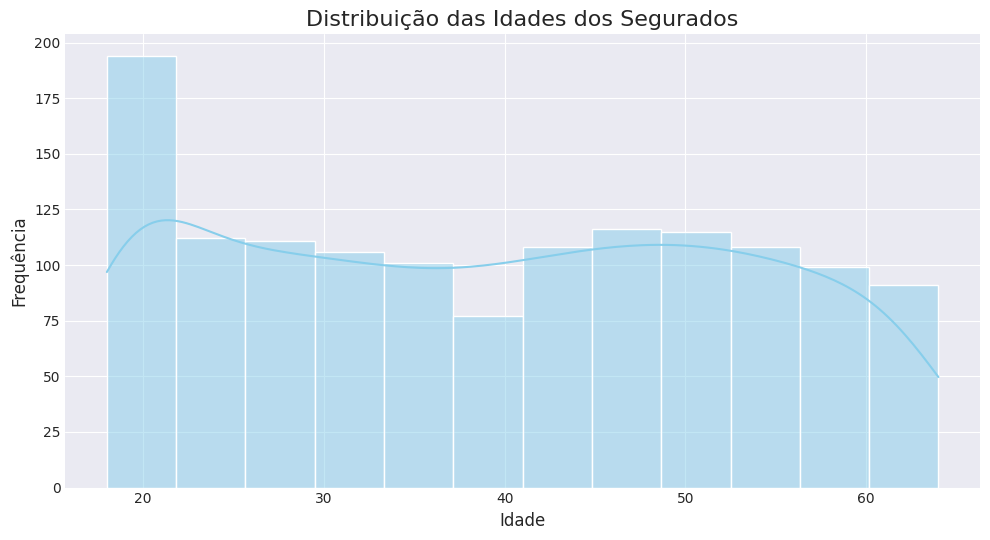

In [10]:
# Configurando o estilo do gráfico
sns.set_style("darkgrid")

# Criando o histograma da distribuição de idades
plt.figure(figsize=(10, 5.5))  # Ajustando o tamanho do gráfico para melhor visualização
sns.histplot(data=df_seguro, x='age', bins=12, kde=True, color='skyblue')

# Adicionando título e rótulos para o gráfico
plt.title('Distribuição das Idades dos Segurados', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.tight_layout()  # Garantindo que os elementos não fiquem sobrepostos
plt.show()

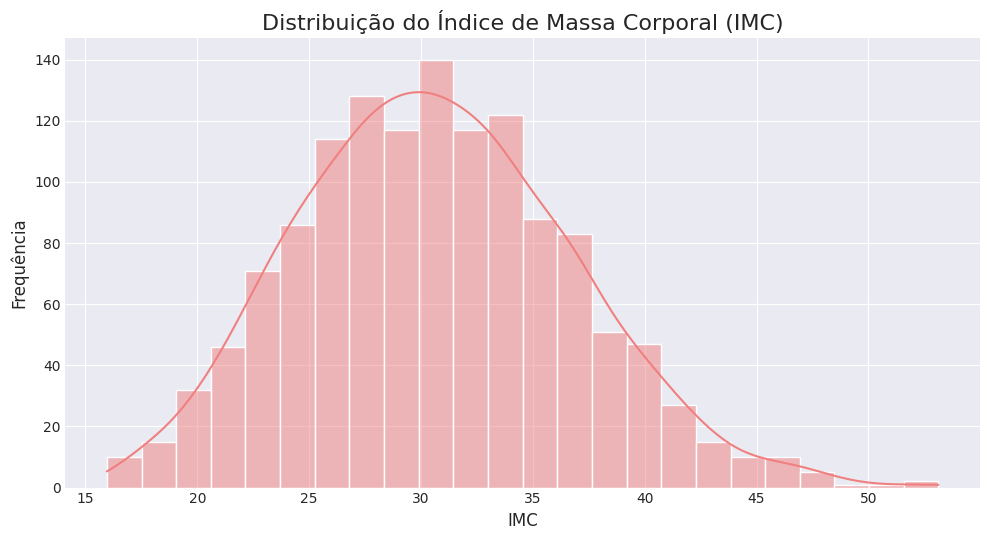

In [11]:
# Configurando o estilo do gráfico
sns.set_style("darkgrid")

# Criando o histograma da distribuição do IMC
plt.figure(figsize=(10, 5.5))  # Ajustando o tamanho do gráfico para melhor visualização
sns.histplot(data=df_seguro, x='bmi', bins=24, kde=True, color='lightcoral')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição do Índice de Massa Corporal (IMC)', fontsize=16)
plt.xlabel('IMC', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.tight_layout()  # Garantindo que os elementos do gráfico não se sobreponham
plt.show()

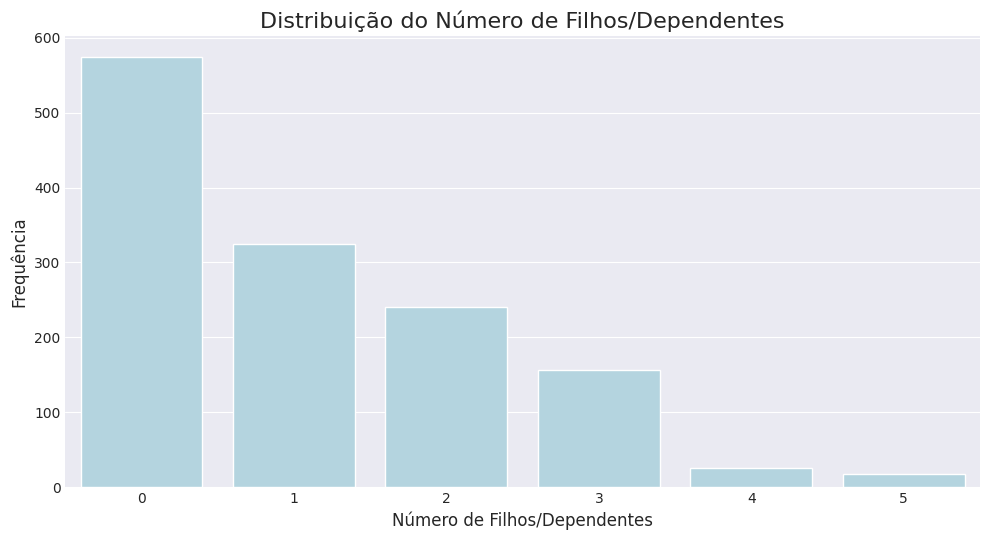

In [12]:
# Configurando o estilo do gráfico
sns.set_style("darkgrid")

# Criando o gráfico de contagem para a variável "children"
plt.figure(figsize=(10, 5.5))  # Ajustando o tamanho do gráfico para melhor visualização
sns.countplot(data=df_seguro, x='children', color='lightblue')  # Usando cor única para evitar o warning

# Adicionando título e rótulos aos eixos
plt.title('Distribuição do Número de Filhos/Dependentes', fontsize=16)
plt.xlabel('Número de Filhos/Dependentes', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.tight_layout()  # Garantindo que os elementos do gráfico não se sobreponham
plt.show()

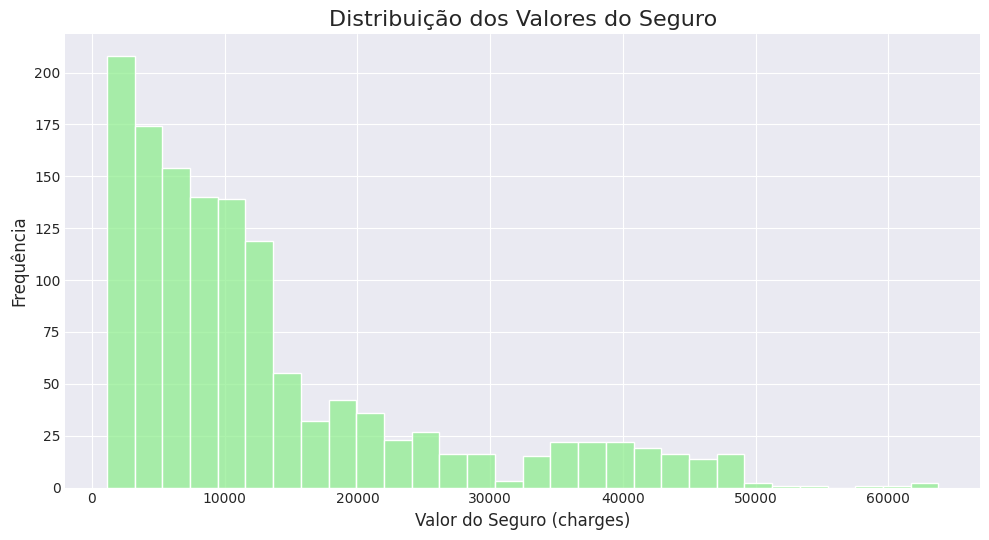

In [13]:
# Configurando o estilo do gráfico
sns.set_style("darkgrid")

# Criando o histograma para a variável target (charges)
plt.figure(figsize=(10, 5.5))  # Ajustando o tamanho do gráfico para melhor visualização
sns.histplot(data=df_seguro['charges'], bins=30, kde=False, color='lightgreen')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição dos Valores do Seguro', fontsize=16)
plt.xlabel('Valor do Seguro (charges)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.tight_layout()  # Garantindo que os elementos não fiquem sobrepostos
plt.show()

## <a> Relação entre as features e a variável target </a>

Uma análise visual pode revelar relações importantes entre as variáveis preditoras e o custo do seguro (variável target). Usaremos gráficos de dispersão para avaliar como variáveis como idade, IMC e número de dependentes estão relacionadas aos valores cobrados. Na diagonal principal, os histogramas mostrarão a distribuição de cada variável.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

<Figure size 1000x550 with 0 Axes>

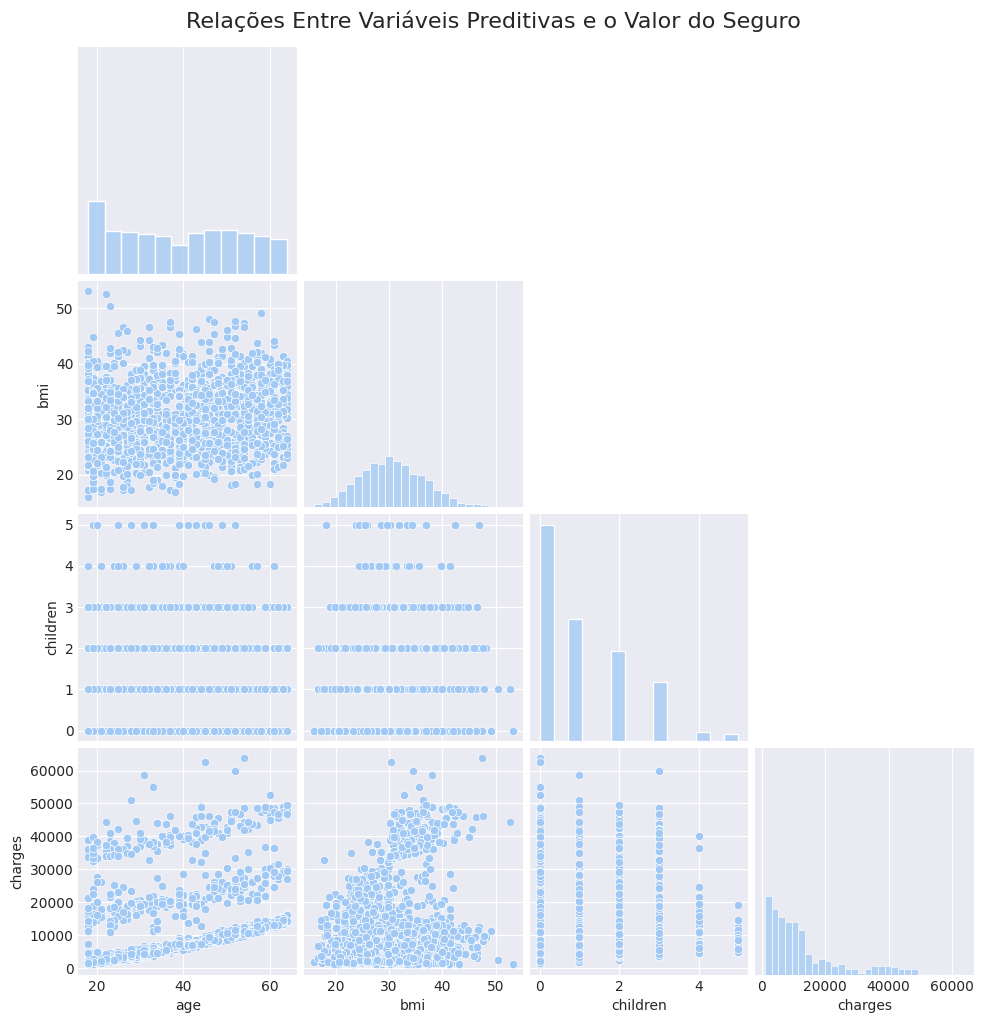

In [14]:
# Configuração inicial do estilo para gráficos
sns.set_style("darkgrid")

# Gráficos de dispersão e histogramas com foco na variável target
plt.figure(figsize=(10, 5.5))  # Ajustando o tamanho dos gráficos para melhor visualização
pairplot = sns.pairplot(
    data=df_seguro,
    diag_kind='hist',  # Mostra histogramas na diagonal principal
    palette='husl',    # Paleta de cores consistente
    corner=True        # Exibe apenas a parte inferior dos gráficos para evitar redundâncias
)

# Ajustando o título para o conjunto de gráficos
pairplot.fig.suptitle("Relações Entre Variáveis Preditivas e o Valor do Seguro", y=1.02, fontsize=16)
plt.show()

Observações sobre os gráficos:

1. A variável `age` parece apresentar uma correlação positiva com charges, indicando que, em geral, custos de seguro aumentam com a idade.
2. A variável `bmi` mostra que pessoas com IMC mais elevado tendem a ter maiores valores de seguro, embora existam exceções.
3. A relação entre `children` e `charges` parece menos evidente, sugerindo que o número de dependentes não tem impacto direto no custo.

## <a> Codificação de Variáveis Categóricas </a>

Lembrando que os modelos de machine learning não sabem o que são categorias em sua maioria, devemos, portanto, codificar as variáveis de sexo, fumante e localização.

In [15]:
# Exibindo as primeiras linhas do dataset original
print("Visualizando as primeiras linhas do DataFrame original:")
display(df_seguro.head())

Visualizando as primeiras linhas do DataFrame original:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [16]:
# 1. Codificação das variáveis binárias (sexo e fumante)
# As variáveis 'sex' e 'smoker' possuem apenas duas categorias, então utilizamos o mapeamento direto
df_seguro['female'] = df_seguro['sex'].map({'female': 1, 'male': 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes': 1, 'no': 0})

# Exibindo o DataFrame após codificar as variáveis binárias
print("\nDataFrame após a codificação das variáveis 'sex' e 'smoker':")
print()
display(df_seguro.head())


DataFrame após a codificação das variáveis 'sex' e 'smoker':



,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [17]:
# Removendo a coluna original 'sex', já que ela foi codificada
df_seguro = df_seguro.drop('sex', axis=1)
print("\nColuna 'sex' removida. Visualizando o DataFrame atualizado:\n")
display(df_seguro.head())


Coluna 'sex' removida. Visualizando o DataFrame atualizado:



,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [18]:
# 2. # Analisando as categorias da variável 'region'
print("Categorias únicas na variável 'region':", ', '.join(map(str, df_seguro['region'].unique())))

Categorias únicas na variável 'region': southwest, southeast, northwest, northeast


In [19]:
# 3. Codificação de variáveis categóricas com múltiplas categorias (região)
# Para 'region', utilizamos a técnica One-Hot Encoding (OHE), criando colunas dummies
# O parâmetro drop_first=True remove a primeira categoria para evitar multicolinearidade
df_seguro = pd.get_dummies(df_seguro, columns=['region'], drop_first=True)

In [20]:
# Exibindo o DataFrame após codificar 'region'
print("\nDataFrame após a codificação One-Hot Encoding para 'region':\n")
display(df_seguro.head())


DataFrame após a codificação One-Hot Encoding para 'region':



,age,bmi,children,smoker,charges,female,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,1,False,False,True
1,18,33.77,1,0,1725.55,0,False,True,False
2,28,33.00,3,0,4449.46,0,False,True,False
3,33,22.70,0,0,21984.47,0,True,False,False
4,32,28.88,0,0,3866.86,0,True,False,False


In [21]:
# 4. Garantindo que as colunas dummies sejam do tipo inteiro (0 e 1)
# Convertendo as colunas dummies para inteiros
dummy_columns = [col for col in df_seguro.columns if 'region_' in col]
df_seguro[dummy_columns] = df_seguro[dummy_columns].astype(int)

In [22]:
# Removendo o prefixo 'region_' das colunas dummies
df_seguro.columns = df_seguro.columns.str.replace('region_', '')

# Exibindo o DataFrame final após renomear as colunas
print("\nDataFrame final após remover o prefixo 'region_':\n")
display(df_seguro.head())


DataFrame final após remover o prefixo 'region_':



,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


## <a> Determinando quem são variáveis preditoras e variável target </a>

Ou... definindo X e y. É a forma mais usual de chamar as variáveis.

In [23]:
# Visualizando as colunas do DataFrame para identificar as variáveis
print("Colunas do DataFrame:\n")
print(list(df_seguro.columns))

Colunas do DataFrame:

['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'northwest', 'southeast', 'southwest']


In [24]:
# Separando as variáveis preditoras (X) e a variável target (y)
# A variável 'charges' é a dependente (target), e todas as outras são preditoras (features)
X = df_seguro.drop('charges', axis=1)  # Removendo a coluna 'charges' do conjunto de preditores
y = df_seguro[['charges']]  # Extraindo apenas a coluna 'charges' como target

In [25]:
# Verificando as variáveis preditoras
print("\nVariáveis preditoras (features):\n")
display(X.head())


Variáveis preditoras (features):



,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [26]:
# Verificando a variável target (dependente)
print("\nVariável target (label):\n")
display(y.head())


Variável target (label):



,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


> Para preparar os dados para modelagem, separamos as variáveis preditoras (`X`) e a variável dependente ou target (`y`). No dataset, a variável `charges` representa o custo do seguro de saúde, que queremos prever, e todas as outras colunas são usadas como preditores (ou features). Essa abordagem é padrão em problemas de aprendizado supervisionado.

## <a> Separação de bases </a>

Vamos separar logo essas bases?? Isso evita data leakage porque vamos fazer feature scaling, por exemplo, e tais transformações deve ser realizadas DEPOIS do split (separação).

In [27]:
# Importando a função para separar a base
from sklearn.model_selection import train_test_split

In [28]:
# Separando a base em treino e teste
# A base de treino será usada para ajustar o modelo, enquanto a base de teste avaliará sua performance
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X,  # Variáveis preditoras
    y,  # Variável target
    test_size=0.2,  # 20% dos dados para teste
    random_state=42  # Garante reprodutibilidade dos resultados
)

In [29]:
# Exibindo as dimensões de cada base
print("Dimensões das bases após a separação:\n")
print(f"Base de treino (X): {X_treino.shape}")
print(f"Base de teste (X): {X_teste.shape}")
print(f"Base de treino (y): {y_treino.shape}")
print(f"Base de teste (y): {y_teste.shape}")

Dimensões das bases após a separação:

Base de treino (X): (1070, 8)
Base de teste (X): (268, 8)
Base de treino (y): (1070, 1)
Base de teste (y): (268, 1)


In [30]:
# Validando o percentual entre treino e total de dados
total_linhas = len(X)
percentual_treino = len(X_treino) / total_linhas * 100
percentual_teste = len(X_teste) / total_linhas * 100

print(f"\nPorcentagem de linhas em cada base:\n")
print(f"Treino: {percentual_treino:.2f}%")
print(f"Teste: {percentual_teste:.2f}%")


Porcentagem de linhas em cada base:

Treino: 79.97%
Teste: 20.03%


> Para evitar o problema de `data leakage`, realizamos a separação da base em treino (80%) e teste (20%) antes de realizar transformações, como normalização ou feature scaling. A base de treino será usada para ajustar o modelo, enquanto a base de teste avaliará sua performance. Garantimos reprodutibilidade da separação com o parâmetro `random_state=42`.

## <a> Feature Scaling </a>

Como usaremos pelo menos um modelo linear, é importante realizar scaling das features para mantê-las numa mesma escala de grandeza. Vamos de MinMaxScaler?

In [31]:
# Visualizando as estatísticas descritivas antes da normalização
print("Estatísticas descritivas antes da normalização:\n")
display(X.describe())

# Explicação:
# O `describe()` acima mostra as diferenças nas escalas das variáveis.
# Por exemplo, a variável 'age' varia de 18 a 64, enquanto 'bmi' varia entre ~15 e ~53.
# Normalizar essas variáveis é essencial para modelos sensíveis à escala, como os lineares.

Estatísticas descritivas antes da normalização:



,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,1.00,1.00,1.00,1.00


In [32]:
# Importando o MinMaxScaler para normalização das features
from sklearn.preprocessing import MinMaxScaler

# Explicação: MinMaxScaler normaliza os valores para o intervalo [0, 1],
# garantindo que todas as variáveis tenham a mesma escala de grandeza.

In [33]:
# Instanciando o scaler
scaler = MinMaxScaler()

In [34]:
# Obtendo os nomes das colunas para manter a referência após o scaling
colunas = X_treino.columns

In [35]:
# Normalizando os dados
# Explicação: O "fit" ajusta o scaler apenas nos dados de treino, e o "transform" aplica a transformação nos conjuntos de treino e teste.
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

In [36]:
# Verificando as dimensões dos conjuntos após o scaling
print("\nDimensões dos conjuntos após o scaling:\n")
print(f"X_treino: {X_treino.shape}")
print(f"X_teste: {X_teste.shape}")


Dimensões dos conjuntos após o scaling:

X_treino: (1070, 8)
X_teste: (268, 8)


In [37]:
# Analisando as primeiras linhas do conjunto de treino após a normalização
print("\nConjunto de treino após o scaling:\n")
display(X_treino.head())


Conjunto de treino após o scaling:



,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [38]:
# Analisando as estatísticas descritivas do conjunto de treino após a normalização
print("\nEstatísticas descritivas do conjunto de treino após a normalização:\n")
display(X_treino.describe())


Estatísticas descritivas do conjunto de treino após a normalização:



,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [39]:
# Analisando as estatísticas descritivas do conjunto de teste após a normalização
print("\nEstatísticas descritivas do conjunto de teste após a normalização:\n")
display(X_teste.describe())


Estatísticas descritivas do conjunto de teste após a normalização:



,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


> Como estamos utilizando pelo menos um modelo linear, é essencial normalizar as features para garantir que todas estejam na mesma escala de grandeza. Utilizamos o `MinMaxScaler` para transformar os valores para o intervalo `[0, 1]`. Realizamos o ajuste (`fit`) do scaler apenas nos dados de treino para `evitar data leakage`, e aplicamos a transformação nos dados de treino e teste de forma separada. Esse procedimento garante que o modelo seja treinado e avaliado de forma justa.

## <a> Analisando a correlação entre variáveis </a>

Quando utilizamos modelos lineares, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo não seja afetado.

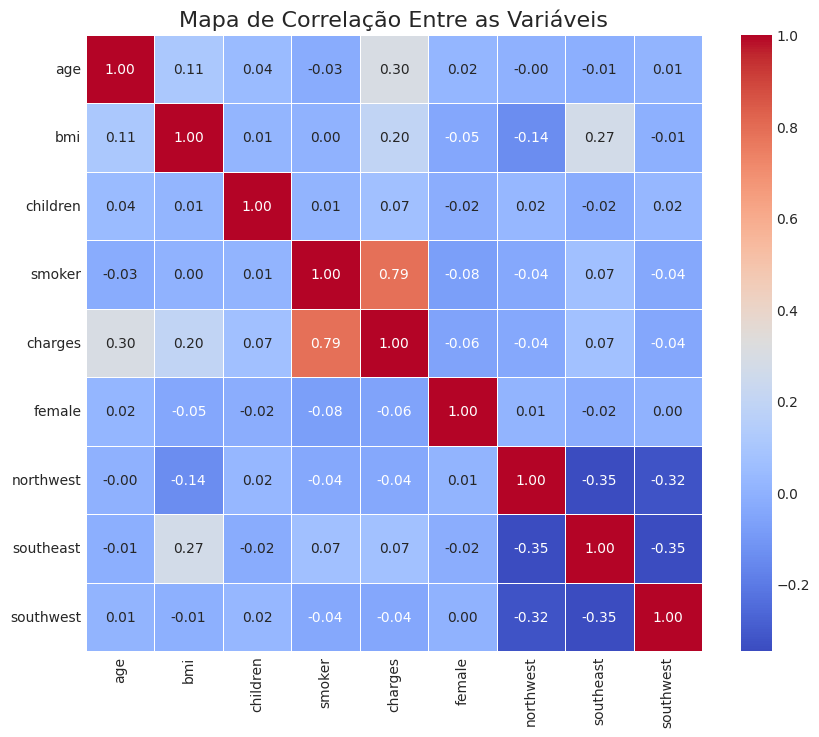

In [40]:
# Criando uma matriz de correlação
corr = df_seguro.corr()

# Configurando o tamanho da figura e plotando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            square=True, cbar=True, linewidths=0.5)

# Adicionando título ao gráfico
plt.title("Mapa de Correlação Entre as Variáveis", fontsize=16)
plt.show()

**Explicação**:
- A matriz de correlação indica a relação linear entre as variáveis.
- Valores próximos de 1 ou -1 indicam alta correlação positiva ou negativa.
- Valores próximos de 0 indicam baixa correlação.
- Caso haja alta correlação entre variáveis preditoras, avaliaremos a necessidade de remover uma delas.

## <a> Analisando se existem dados faltantes </a>

In [41]:
# Verificando dados faltantes
missing_data = df_seguro.isnull().sum()

# Exibindo apenas colunas com valores faltantes (se houver)
missing_data = missing_data[missing_data > 0]

if not missing_data.empty:
    print("\nColunas com valores faltantes:")
    print(missing_data)
else:
    print("\nNão há dados faltantes no DataFrame.")


Não há dados faltantes no DataFrame.


In [42]:
# Confirmando a premissa acima
print(df_seguro.isna().sum())

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64


> A análise de valores faltantes foi realizada para garantir a integridade dos dados. Caso existam valores ausentes, eles devem ser tratados antes da modelagem (ex.: remoção, imputação, etc.).

## <a> Vamos de Machine Learning? </a>

Primeiro modelo que vamos treinar é a regressão linear. Lembrando que vamos utilizar cross validation para evitar overfit e ter uma base de comparação para outros modelos

In [43]:
# Importando a regressão linear e a cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Criando o estimador (modelo de regressão linear)
regressao_linear = LinearRegression()

# Explicação:
# Estamos utilizando Cross-Validation (CV) para avaliar a performance do modelo.
# A métrica escolhida é o RMSE (Root Mean Squared Error), que é uma métrica comum para avaliar a performance em problemas de regressão.
# O RMSE mede o erro médio em termos absolutos (na mesma unidade da variável target).

In [44]:
# Treinando e avaliando o modelo com 10-fold CV
valores_rmse_rl = cross_val_score(
    estimator=regressao_linear,          # Modelo
    X=X_treino,                         # Features de treino
    y=y_treino,                         # Target de treino
    cv=10,                              # Validação cruzada com 10 "folds"
    scoring='neg_root_mean_squared_error'  # RMSE (valores negativos para compatibilidade)
)

In [45]:
# Ajustando os valores para serem positivos
valores_rmse_rl = valores_rmse_rl * -1

In [46]:
# Exibindo os valores de RMSE para cada iteração do CV
print("Valores de RMSE para cada fold da validação cruzada:\n")
print(valores_rmse_rl)

Valores de RMSE para cada fold da validação cruzada:

[6073.99997254 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7281.08373608 6321.52706355 6193.3145481  5637.06299714]


In [47]:
# Calculando e exibindo a média do RMSE
media_rmse_rl = valores_rmse_rl.mean()
print(f"\nMédia do RMSE (Regressão Linear com 10-fold CV): `{media_rmse_rl:.2f}`")


Média do RMSE (Regressão Linear com 10-fold CV): `6133.08`


>Utilizamos o RMSE (`Root Mean Squared Error`) como métrica, que mede o erro médio de previsão em termos absolutos, na mesma unidade da variável target. Quanto menor o RMSE, melhor o desempenho do modelo.

### Vamos tentar agora uma árvore de regressão?

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de árvore de regressão
arvore_regressao = DecisionTreeRegressor(random_state=42)

# 1. Avaliando a árvore de regressão com as regiões incluídas
valores_rmse_arvore = cross_val_score(
    estimator=arvore_regressao,
    X=X_treino,
    y=y_treino,
    cv=10,
    scoring='neg_root_mean_squared_error'
)
valores_rmse_arvore

array([-7056.72603093, -7610.79011415, -6947.83358299, -6738.37054517,
       -7214.01478309, -5567.50878733, -7461.82618427, -6984.28101793,
       -6849.63899507, -6229.83511964])

In [49]:
# Ajustando os valores de RMSE para serem positivos
valores_rmse_arvore = valores_rmse_arvore * (-1)
media_rmse_arvore = valores_rmse_arvore.mean()

# Exibindo resultados
print("Resultados com árvore de regressão (com regiões):")
print(f"Valores de RMSE: \n{valores_rmse_arvore}")

Resultados com árvore de regressão (com regiões):
Valores de RMSE: 
[7056.72603093 7610.79011415 6947.83358299 6738.37054517 7214.01478309
 5567.50878733 7461.82618427 6984.28101793 6849.63899507 6229.83511964]


In [50]:
print(f"Média do RMSE: {media_rmse_arvore:.2f}")

Média do RMSE: 6866.08


### E se retiramos as colunas de regiões. Na análise de correlação elas não mostraram muita influência na variável target

In [51]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [52]:
# 2. Removendo as colunas de regiões e avaliando novamente
colunas_regiao = ['northwest', 'southeast', 'southwest']

# Árvore de regressão sem colunas de regiões
valores_rmse_arvore_sem_regiao = cross_val_score(
    estimator=arvore_regressao,
    X=X_treino.drop(colunas_regiao, axis=1),
    y=y_treino,
    cv=10,
    scoring='neg_root_mean_squared_error'
)

In [53]:
# Ajustando os valores de RMSE para serem positivos
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * (-1)
media_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao.mean()

# Exibindo resultados
print("\nResultados com árvore de regressão (sem regiões):")
print(f"Valores de RMSE: \n{valores_rmse_arvore_sem_regiao}")


Resultados com árvore de regressão (sem regiões):
Valores de RMSE: 
[6603.80533061 6847.73875459 6641.57734091 6780.95447643 7391.3895362
 6730.2627131  7819.2110623  7355.19301233 7088.86916713 6261.6511584 ]


In [54]:
print(f"Média do RMSE: {media_rmse_arvore_sem_regiao:.2f}")

Média do RMSE: 6952.07


In [55]:
# 3. Regressão Linear sem colunas de regiões
valores_rmse_rl_sem_regiao = cross_val_score(
    estimator=regressao_linear,
    X=X_treino.drop(colunas_regiao, axis=1),
    y=y_treino,
    cv=10,
    scoring='neg_root_mean_squared_error'
)

# Ajustando os valores de RMSE para serem positivos
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * (-1)
media_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao.mean()

In [56]:
# Exibindo resultados
print("\nResultados com regressão linear (sem regiões):")
print(f"Valores de RMSE: \n{valores_rmse_rl_sem_regiao}")


Resultados com regressão linear (sem regiões):
Valores de RMSE: 
[6047.74861144 6576.17442833 5208.18399508 5969.09583538 5870.19697933
 6107.50898187 7295.03885205 6309.72867769 6178.86188095 5652.91238386]


In [57]:
print(f"Média do RMSE: {media_rmse_rl_sem_regiao:.2f}")

Média do RMSE: 6121.55


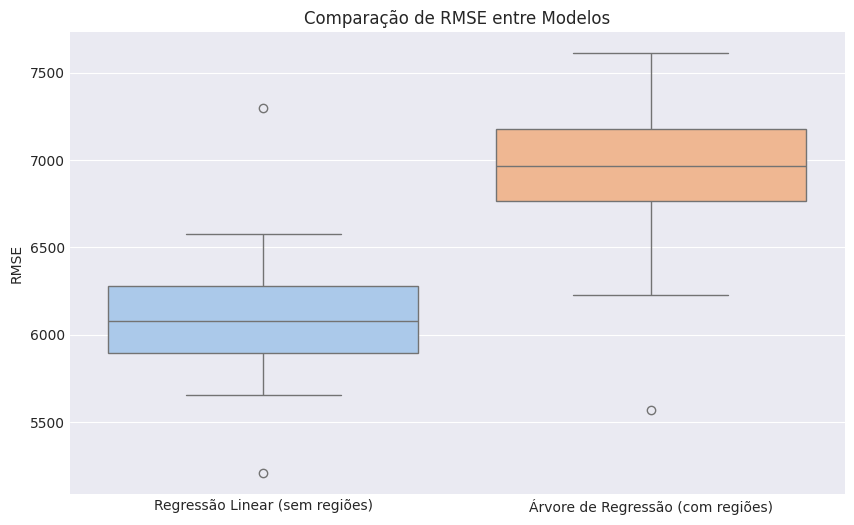

In [58]:
# 4. Comparação final: boxplot de RMSE
rmse = pd.DataFrame({
    'Regressão Linear (sem regiões)': valores_rmse_rl_sem_regiao,
    'Árvore de Regressão (com regiões)': valores_rmse_arvore
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=rmse).set_title("Comparação de RMSE entre Modelos")
plt.ylabel("RMSE")
plt.show()

1. **Por que a Árvore de Regressão?**<br>
A árvore de regressão é um modelo não linear capaz de capturar interações complexas entre as variáveis preditoras. Por isso, é uma excelente alternativa para comparação com a regressão linear, que assume uma relação linear entre as variáveis.

2. **Impacto da Exclusão de Regiões**<br>
As variáveis categóricas relacionadas à região mostraram baixa correlação com a variável target. Por isso, testamos os modelos com e sem essas variáveis para avaliar se sua exclusão melhoraria a performance.

3. **Métrica RMSE**<br>
O RMSE (Root Mean Squared Error) foi usado para avaliar os modelos, pois mede o erro médio absoluto das previsões na mesma escala da variável target. Quanto menor o RMSE, melhor o desempenho do modelo.

## <a> Modelo Campeão! </a>

Agora que temos um modelo campeao, vamos treinar modelo na base de treinamento toda!


In [59]:
# Treinando o modelo campeão (Regressão Linear)
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [60]:
# Extraindo os coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': regressao_linear.feature_names_in_,
    'Coeficiente': regressao_linear.coef_.flatten()
})

# Exibindo os coeficientes
print("Coeficientes do modelo campeão:\n")
display(coeficientes.T)

Coeficientes do modelo campeão:



,0,1,2,3,4
Variável,age,bmi,children,smoker,female
Coeficiente,11825.17,12174.42,2136.27,23653.90,7.95


In [61]:
# Calculando os p-valores usando statsmodels
import statsmodels.api as sm

# Adicionando constante para o modelo (statsmodels exige isso)
X_treino_sm = sm.add_constant(X_treino.drop(colunas_regiao, axis=1))

# Ajustando o modelo com statsmodels
rl_statsmodels = sm.OLS(y_treino, X_treino_sm)
resultado_fit = rl_statsmodels.fit()

# Extraindo coeficientes e p-valores
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
coeficientes_stats = resultado_fit.params

# Criando um DataFrame com coeficientes e p-valores
coeficientes = pd.DataFrame({
    'Variável': coeficientes_stats.index,
    'Coeficiente': coeficientes_stats.values,
    'P-valor': p_valores.values
})

# Exibindo os coeficientes e seus respectivos p-valores
print("\nCoeficientes e p-valores do modelo campeão:\n")
display(coeficientes)


Coeficientes e p-valores do modelo campeão:



,Variável,Coeficiente,P-valor
0,const,-2266.73,0.00
1,age,11825.17,0.00
2,bmi,12174.42,0.00
3,children,2136.27,0.01
4,smoker,23653.90,0.00
5,female,7.95,0.98


In [62]:
# Conclusão baseada nos p-valores
print("\nAnálise baseada nos p-valores:")
for index, row in coeficientes.iterrows():
    if row['P-valor'] < 0.05:
        print(f"- A variável '{row['Variável']}' é estatisticamente significativa (P-valor = {row['P-valor']:.3f}).")
    else:
        print(f"- A variável '{row['Variável']}' NÃO é estatisticamente significativa (P-valor = {row['P-valor']:.3f}).")


Análise baseada nos p-valores:
- A variável 'const' é estatisticamente significativa (P-valor = 0.000).
- A variável 'age' é estatisticamente significativa (P-valor = 0.000).
- A variável 'bmi' é estatisticamente significativa (P-valor = 0.000).
- A variável 'children' é estatisticamente significativa (P-valor = 0.006).
- A variável 'smoker' é estatisticamente significativa (P-valor = 0.000).
- A variável 'female' NÃO é estatisticamente significativa (P-valor = 0.983).


> A análise dos coeficientes do modelo campeão indica que as variáveis `age`, `bmi`, e `smoker` têm impacto estatisticamente significativo e prático nos custos do plano de saúde, com a variável `smoker` mostrando o maior impacto. A variável `female` não foi estatisticamente significativa (`p = 0.98`) e pode ser removida do modelo para simplificação. Os resultados reforçam a importância de considerar hábitos de vida, como o hábito de fumar, no cálculo de custos de seguro.

## <a> Finalmente </a>

Agora que temos nosso modelo final, podemos fazer inferências dos valores do plano de saúde no teste. Percebam que nunca utilizamos o teste PARA NADA, como deve ser.

In [63]:
# Realizando previsões no conjunto de teste
# O modelo utiliza o método predict para realizar as inferências
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))

# Exibindo as primeiras previsões
print("Primeiros valores previstos pelo modelo:\n")
print(precos_preditos[:5])

Primeiros valores previstos pelo modelo:

[[ 8554.81711589]
 [ 6973.58746745]
 [36798.60416104]
 [ 9417.88282303]
 [26871.68031081]]


In [64]:
# Conferindo o número de previsões
print("\nNúmero total de previsões:", len(precos_preditos))


Número total de previsões: 268


In [65]:
# Conferindo os valores reais (target no conjunto de teste)
print("\nPrimeiros valores reais do conjunto de teste:\n")
display(y_teste.head())


Primeiros valores reais do conjunto de teste:



,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [66]:
# Comparando previsões com valores reais
predicoes_vs_real = pd.DataFrame({
    'predicao': precos_preditos.flatten(),
    'real': y_teste.values.flatten()
})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])

print("\nPrimeiras 20 previsões vs valores reais:")
display(predicoes_vs_real.head(20))


Primeiras 20 previsões vs valores reais:


,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [67]:
# Avaliando a performance do modelo com o R²
from sklearn.metrics import r2_score

r2 = r2_score(y_true=y_teste, y_pred=precos_preditos)
print(f"\nR² do modelo no conjunto de teste: {r2:.4f}")
print("Nosso modelo explica", f"{r2*100:.2f}%", "da variabilidade na variável target.")


R² do modelo no conjunto de teste: 0.7811
Nosso modelo explica 78.11% da variabilidade na variável target.


Até que 0,78 não é ruim, nosso modelo explica bastante a variável target

#### Quer testar uma predição com inputs?

In [68]:
# Testando uma predição com inputs
print("\nTeste com inputs do usuário:")

# Obtendo os inputs
idade = float(input("Idade: "))
indice_massa_corporal = float(input("Índice de Massa Corporal (IMC): "))
dependentes = int(input("Número de dependentes: "))
fumante = int(input("1 para fumante, 0 para não fumante: "))
sexo = int(input("1 para mulher, 0 para homem: "))


Teste com inputs do usuário:
Idade: 20
Índice de Massa Corporal (IMC): 35
Número de crianças: 1
1 para fumante, 0 para não fumante: 1
1 para mulher, 0 para homem: 0


In [69]:
# Exibindo os inputs capturados
print("\nInputs recebidos:")
print(f"Idade: {idade}, IMC: {indice_massa_corporal}, Crianças: {criancas}, Fumante: {fumante}, Sexo: {sexo}")

# Realizando scaling das features (usando o scaler do treino)
features = [[idade, indice_massa_corporal, criancas, fumante, sexo]]


Inputs recebidos:
Idade: 20.0, IMC: 35.0, Crianças: 1, Fumante: 1, Sexo: 0


In [70]:
colunas_esperadas = X_treino.columns  # Todas as colunas usadas no treino (incluindo regiões)

# Adicionando valores fictícios (1, 1, 1 para as colunas de região, conforme padrão)
inputs = [idade, indice_massa_corporal, criancas, fumante, sexo]
valores_completos = inputs + [1, 1, 1]  # Adicionando valores fictícios para as colunas de região

# Criando um DataFrame para manter o formato esperado pelo scaler
features_df = pd.DataFrame([valores_completos], columns=colunas_esperadas)

# Aplicando a normalização
features_scaled = scaler.transform(features_df)

# Filtrando apenas as 5 features relevantes
features_final = features_scaled[:, :-3]

In [71]:
# Realizando a previsão com o modelo
resultado = regressao_linear.predict(features_final)

# Extraindo o valor escalar corretamente
resultado_float = resultado.item(0)  # Extrai o primeiro elemento de forma segura

# Exibindo o resultado formatado
print("\nPrevisão do custo do plano de saúde:")
print(f"R$ {resultado_float:,.2f}")


Previsão do custo do plano de saúde:
R$ 28,564.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


> O modelo foi testado no conjunto de teste, nunca utilizado durante o treino, garantindo a avaliação imparcial de sua performance. O coeficiente de determinação (R²) foi de 0.78, indicando que o modelo explica `78%` da variabilidade nos custos do plano de saúde. Além disso, foi implementada uma interface para testar o modelo com inputs personalizados.